<a href="https://colab.research.google.com/github/vaish30/ML_Projects/blob/main/Word2Vec_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import re

In [1]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

Pre-Processing Stage

Step1: splitting the text up into smaller units like words, getting rid of punctuations

In [9]:

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())


def mapping(tokens):
    word_to_id = {}
    id_to_word = {}

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word


np.random.seed(42)


def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)

    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i),
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))

    return np.asarray(X), np.asarray(y)

def concat(*iterables):
    for iterable in iterables:
        yield from iterable

def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [3]:
tokens = tokenize(text)

In [13]:
len(tokens)

84

In [4]:
print(tokens)

['machine', 'learning', 'is', 'the', 'study', 'of', 'computer', 'algorithms', 'that', 'improve', 'automatically', 'through', 'experience', 'it', 'is', 'seen', 'as', 'a', 'subset', 'of', 'artificial', 'intelligence', 'machine', 'learning', 'algorithms', 'build', 'a', 'mathematical', 'model', 'based', 'on', 'sample', 'data', 'known', 'as', 'training', 'data', 'in', 'order', 'to', 'make', 'predictions', 'or', 'decisions', 'without', 'being', 'explicitly', 'programmed', 'to', 'do', 'so', 'machine', 'learning', 'algorithms', 'are', 'used', 'in', 'a', 'wide', 'variety', 'of', 'applications', 'such', 'as', 'email', 'filtering', 'and', 'computer', 'vision', 'where', 'it', 'is', 'difficult', 'or', 'infeasible', 'to', 'develop', 'conventional', 'algorithms', 'to', 'perform', 'the', 'needed', 'tasks']


lookup table is a dictionary object containing the relationship between words and ids.

In [7]:
word_to_id, id_to_word = mapping(tokens)
word_to_id

{0: 'training',
 1: 'predictions',
 2: 'so',
 3: 'study',
 4: 'mathematical',
 5: 'decisions',
 6: 'sample',
 7: 'applications',
 8: 'conventional',
 9: 'machine',
 10: 'subset',
 11: 'improve',
 12: 'are',
 13: 'used',
 14: 'known',
 15: 'without',
 16: 'do',
 17: 'or',
 18: 'data',
 19: 'build',
 20: 'vision',
 21: 'computer',
 22: 'difficult',
 23: 'where',
 24: 'artificial',
 25: 'is',
 26: 'to',
 27: 'programmed',
 28: 'infeasible',
 29: 'filtering',
 30: 'it',
 31: 'intelligence',
 32: 'a',
 33: 'based',
 34: 'on',
 35: 'as',
 36: 'that',
 37: 'explicitly',
 38: 'model',
 39: 'and',
 40: 'order',
 41: 'perform',
 42: 'seen',
 43: 'variety',
 44: 'wide',
 45: 'experience',
 46: 'algorithms',
 47: 'develop',
 48: 'email',
 49: 'automatically',
 50: 'being',
 51: 'in',
 52: 'learning',
 53: 'such',
 54: 'make',
 55: 'needed',
 56: 'of',
 57: 'the',
 58: 'tasks',
 59: 'through'}

Generating training data

In [10]:
X, y = generate_training_data(tokens, word_to_id, 2)

In [11]:
X.shape

(330, 60)

In [12]:
y.shape

(330, 60)

Word Embeddings
A1=XW1

A2=A1W2

Adjusting weight with softmax layer

Z=softmax(A2)(6) - Z is the matrix contains the prediction probability vectors.


In [14]:
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [15]:
model = init_network(len(word_to_id), 10)

In [16]:
model

{'w1': array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
         -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
        [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
         -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
        [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
          0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375],
        [-0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
         -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124],
        [ 0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
         -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016],
        [ 0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
          0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513],
        [-0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
          1.35624003, -0.0

Implementing Forward propagation


In [20]:
def forward(model, X, return_cache=True):
    cache = {}

    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])

    if not return_cache:
        return cache["z"]
    return cache


def softmax(X):
  res = []
  for x in X:
      exp = np.exp(x)
      res.append(exp / exp.sum())
  return res

In [22]:
##gives the dimentinality of the matrix

(X @ model["w1"]).shape

(330, 10)

In [23]:
(X @ model["w1"] @ model["w2"]).shape

(330, 60)

Implementing backward propagation

In [25]:
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)


def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

<ipython-input-26-f4f09dca4e00>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


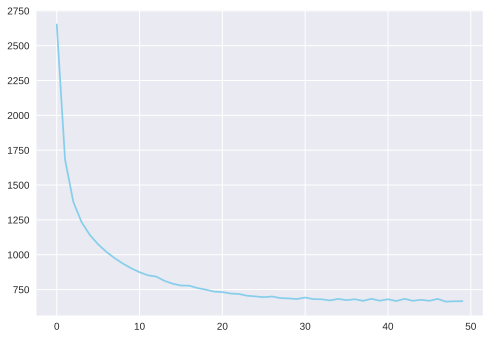

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

n_iter = 50
learning_rate = 0.05

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [28]:
learning = one_hot_encode(word_to_id["learning"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)


machine
is
intelligence
so
build
are
the
perform
subset
study
artificial
through
computer
infeasible
that
needed
algorithms
learning
decisions
variety
a
conventional
tasks
it
develop
based
used
automatically
of
model
or
programmed
difficult
do
wide
such
vision
improve
make
predictions
explicitly
mathematical
experience
in
to
where
seen
data
filtering
applications
without
on
and
being
training
email
sample
order
known
as


In [29]:
model["w1"]

array([[ 1.19400593e+00, -1.05379393e+00,  1.69312997e+00,
        -6.53717470e-01,  8.78078118e-02,  7.58208130e-01,
        -5.11951886e-01, -4.48896818e-01,  8.32656524e-01,
        -1.16633230e+00],
       [ 1.45260840e+00, -5.87630206e-01,  6.39239809e-01,
        -1.40189171e+00, -7.72578586e-01, -3.55513869e-01,
         6.36384303e-01,  1.77668300e+00, -1.09736704e+00,
         2.35515339e-01],
       [ 9.10019155e-01, -4.30102369e-01,  6.40846417e-01,
        -2.47049528e+00, -1.83477521e+00, -5.10128983e-01,
         4.59282364e-01,  1.44399415e-01,  1.70518799e-01,
        -8.79646094e-02],
       [-6.65029374e-01,  1.88595951e+00, -9.69230119e-01,
        -9.48073754e-01,  2.52085536e-01, -1.12788978e+00,
         4.50068779e-01, -2.39824190e+00, -5.75906411e-01,
         4.66634859e-01],
       [-5.07707585e-01,  1.53906514e-01, -8.86714614e-02,
        -5.30841760e-01, -2.47348849e+00, -8.56880519e-01,
        -1.59582323e+00,  1.18583321e+00, -4.27096325e-01,
        -1.

In [30]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

result of training with context data generated through the sliding window algorithm - vectors encode meaningful semantic information that tells us which words tend to go along with each other.

In [31]:
get_embedding(model, "machine")

array([ 0.52832214,  0.42987119, -1.72293717, -1.21241832, -0.68705962,
       -1.53706458, -0.35823712, -0.45492428,  0.57052377, -0.34212686])